# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details.)  
This note compares a patient in MIMIC with their simulated counterpart. This version includes the env changes induced every hour based on patients' FiO2 readings.

In [16]:
import pandas as pd
icustayid = 23870.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_v2_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,120.2125475722571,6628.470884580361,10.006833084029125,36.998703448312085,62.471961279149966,33.78486360133442,111.11111111111109,0.20100000000000023,92.53818267152128,0.9749255382648999,20.00000000000003,0.0,120.85616262665467,4.273863e+09
1,88.35591124096389,6996.033846676159,35.577646123885046,37.28971951119422,57.931599845663314,34.76924925816695,93.74999999999996,-0.039,92.80424244756874,0.999331875378003,20.134228187919494,10800.000000142898,125.45845689985684,4.273874e+09
2,69.93251092511812,7569.346458000268,35.05173783263817,37.28959820363593,53.918232095606946,34.7136998288642,85.71428571428568,-0.018000000000000127,93.20361160913137,0.9938353163240596,20.00000000000003,36000.00000010506,130.54619516281477,4.273899e+09
3,56.1494160688747,7752.3237933419805,21.348258884672923,37.28867101167987,51.45704375249978,34.862553127278986,78.9473684210526,-0.039,93.23886724056145,0.9997491903564777,20.2702702702703,46799.99999837629,133.56649155488728,4.273910e+09
4,119.68170244663722,8055.893787889476,0.32277525510915617,37.28784422589001,49.91919891509904,34.73581142795858,76.92307692307689,-0.07149999999999995,93.50258626944559,0.9939416566914464,20.00000000000003,68399.99999596066,136.0962442305243,4.273931e+09


In [4]:
len(simulation)

59

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

59

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
791,1.0,23870.0,4.273863e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,0.888060,204.999992,0.0,0.0,0.0,0.0,5754.0,2877.0,-5754.0,1.0
792,4.0,23870.0,4.273874e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,8631.0,2877.0,-8631.0,1.0
793,11.0,23870.0,4.273899e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.061947,81.249999,0.0,0.0,0.0,0.0,11508.0,2877.0,-11508.0,1.0
794,14.0,23870.0,4.273910e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,14385.0,2877.0,-14385.0,1.0
795,20.0,23870.0,4.273931e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,405.0,405.0,15612.0,1227.0,-15207.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

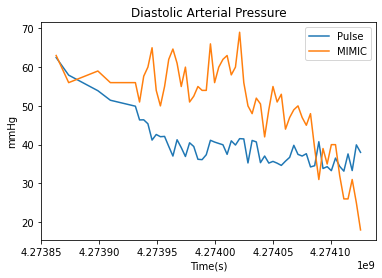

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

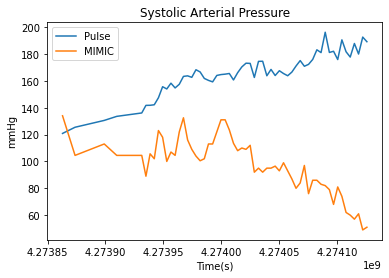

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

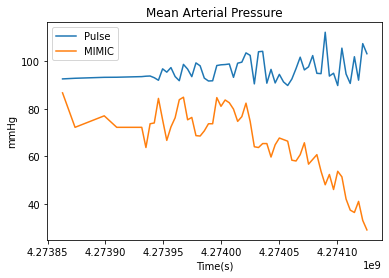

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

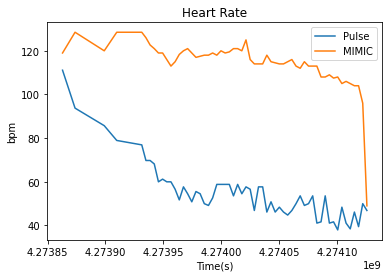

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

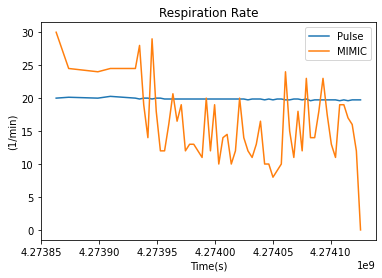

In [14]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

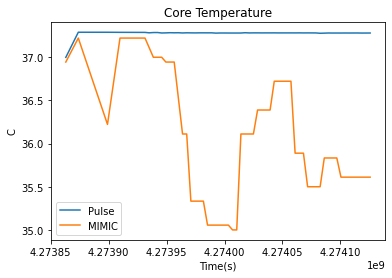

In [15]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()